# 📘 Ridge Regression

## 📖 1. What Is Ridge Regression?

**Ridge regression** is a form of **regularized linear regression** that addresses **multicollinearity** and **overfitting** by shrinking the size of the coefficients.

It adds an **L2 penalty** (squared magnitude of coefficients) to the loss function.

---

### 🧠 Objective Function

$$
\mathcal{L}(\boldsymbol{\beta}) = \sum_{i=1}^{n} (y_i - \mathbf{x}_i^\top \boldsymbol{\beta})^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$

- $ \lambda \geq 0 $: regularization strength
- Intercept $ \beta_0 $ is typically not penalized

---

## 💡 Why Use Ridge?

- Handles **multicollinearity**
- Controls **model complexity**
- Improves **generalization** in high dimensions

---

## 📐 Matrix Form

$$
\boldsymbol{\hat{\beta}}^{\text{ridge}} = (\mathbf{X}^\top \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^\top \mathbf{y}
$$





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
sns.set(style='whitegrid')

np.random.seed(42)
n = 100
X1 = np.random.normal(0, 1, n)
X2 = X1 + np.random.normal(0, 0.01, n)
X = np.column_stack([X1, X2])
y = 3 * X1 + 3 * X2 + np.random.normal(0, 1, n)

In [2]:
# Fit OLS
ols = LinearRegression().fit(X, y)
y_ols = ols.predict(X)
print("OLS Coefs:", ols.coef_)
print("OLS R^2:", r2_score(y, y_ols))

OLS Coefs: [4.45376703 1.77232233]
OLS R^2: 0.965756658067243


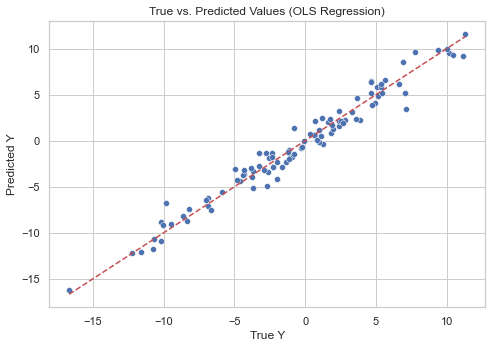

In [9]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y, y=y_ols)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal diagonal
plt.xlabel("True Y")
plt.ylabel("Predicted Y")
plt.title("True vs. Predicted Values (OLS Regression)")
plt.tight_layout()
plt.show()

In [7]:
# Fit Ridge


ridge = Ridge(alpha=1.0,solver='sparse_cg').fit(X, y)
y_ridge = ridge.predict(X)
print("Ridge Coefs:", ridge.coef_)
print("Ridge R^2:", r2_score(y, y_ridge))

Ridge Coefs: [3.09715969 3.09281823]
Ridge R^2: 0.9657159427090515


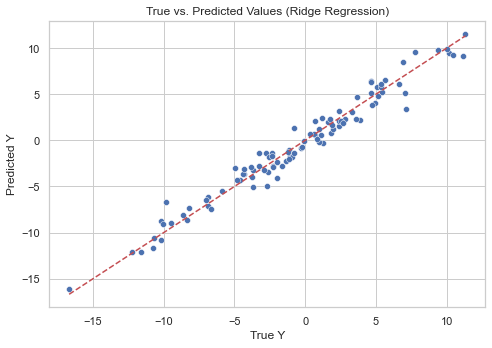

In [8]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y, y=y_ridge)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal diagonal
plt.xlabel("True Y")
plt.ylabel("Predicted Y")
plt.title("True vs. Predicted Values (Ridge Regression)")
plt.tight_layout()
plt.show()

## 🧪 Additional Simulated Example: High-Dimensionality

In [38]:
# High-dimensional setup
n, p = 100, 100
np.random.seed(1)
X_hd = np.random.normal(0, 1, (n, p))
beta_true = np.zeros(p)
beta_true[:5] = 3  # only first 5 predictors matter
y_hd = X_hd @ beta_true + np.random.normal(0, 0.8, n)

In [47]:
# Fit OLS
ols = LinearRegression().fit(X_hd, y_hd)
y_ols = ols.predict(X_hd)
print("OLS Coefs:", ols.coef_)
print("OLS R^2:", r2_score(y_hd, y_ols))

OLS Coefs: [-0.10193662  3.39947379  1.30887434  3.29548378  2.84853373  3.58134272
  1.57474756 -0.93878627 -1.45200386  0.89280948 -0.78657051 -0.77556745
  2.456003    0.19376311  0.48200401 -0.43577303 -0.100113   -0.05917318
  0.64995519 -0.3426157   0.04657105  1.94990711  0.74071132 -2.34580082
 -1.07907828 -2.81959154  2.28873762 -0.79670614 -0.39232449 -1.44174014
  1.23522461  1.01127858 -1.75591639  0.08839299  1.01492713 -0.29179578
  1.21491434  2.96501623 -2.64008361 -1.56036555 -2.76624551  2.45469937
 -2.08533718  0.23257197  0.30430495  1.41677007  0.43855376 -0.19191368
  0.43571985  0.17423047  0.05951535 -1.71093814 -3.05579021  0.88996379
 -3.51066269  1.21368027 -1.75181002 -2.06502469 -2.22544635  2.12758923
 -1.57063695  0.91707092  1.73261718 -0.95335679  0.34704541  1.98958555
 -1.93230869 -0.36310373  0.01470129 -1.8061873  -2.82568692  2.76464559
 -1.34302006 -0.98522313  1.4577042  -2.84781439 -1.12626648 -0.87451296
  0.1771256  -0.37681578 -0.95406559  1.

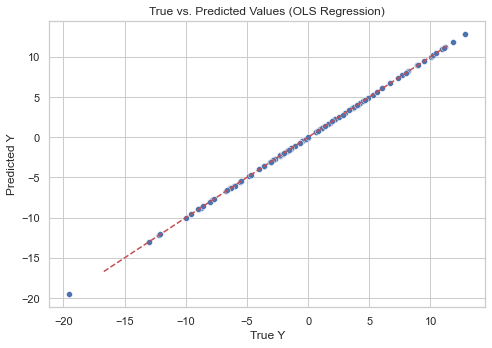

In [49]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_hd, y=y_ols)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal diagonal
plt.xlabel("True Y")
plt.ylabel("Predicted Y")
plt.title("True vs. Predicted Values (OLS Regression)")
plt.tight_layout()
plt.show()

In [40]:
# Ridge on high-dimensional data
ridge_hd = Ridge(alpha=0.3,solver='sparse_cg').fit(X_hd, y_hd)
y_pred_hd = ridge_hd.predict(X_hd)
print("Ridge R^2 (high-dim):", r2_score(y_hd, y_pred_hd))
print("Ridge MSE (high-dim):", mean_squared_error(y_hd, y_pred_hd))

Ridge R^2 (high-dim): 0.999585466644335
Ridge MSE (high-dim): 0.016687910359686583


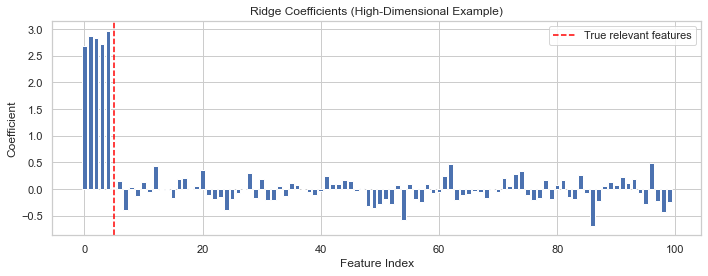

In [41]:
# Plot coefficient magnitudes
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.bar(np.arange(p), ridge_hd.coef_)
plt.axvline(5, color='red', linestyle='--', label='True relevant features')
plt.title("Ridge Coefficients (High-Dimensional Example)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient")
plt.legend()
plt.tight_layout()
plt.show()

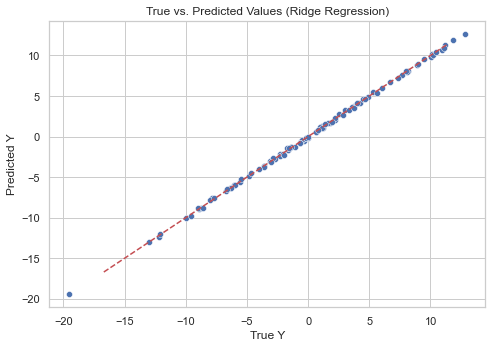

In [52]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_hd, y=y_pred_hd)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal diagonal
plt.xlabel("True Y")
plt.ylabel("Predicted Y")
plt.title("True vs. Predicted Values (Ridge Regression)")
plt.tight_layout()
plt.show()

R^2 Score: 0.5943141338604155
MSE: 0.5289960739525275
Coefficients: [ 0.82622026  0.117184   -0.24875502  0.29018013 -0.00861258 -0.0305739
 -0.89964044 -0.86979832]
Intercept: 2.0724989589389438


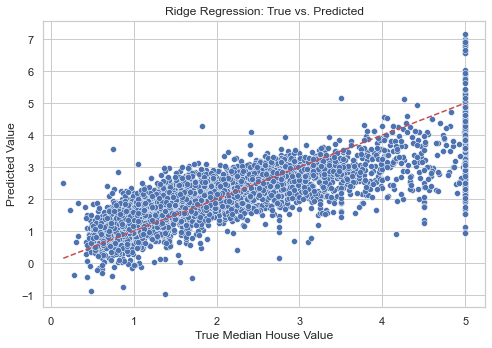

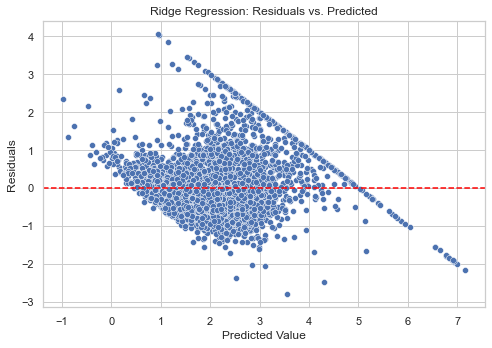

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style='whitegrid')

# Load the dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Select a few predictors
#X_small = X[['MedInc', 'AveRooms', 'HouseAge']]
X_small = X 

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_small, y, test_size=0.2, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Ridge Regression
ridge = Ridge(alpha=1.0,solver='sparse_cg')
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

# Evaluation
print("R^2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)

# True vs. Predicted Plot
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Median House Value")
plt.ylabel("Predicted Value")
plt.title("Ridge Regression: True vs. Predicted")
plt.tight_layout()
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Value")
plt.ylabel("Residuals")
plt.title("Ridge Regression: Residuals vs. Predicted")
plt.tight_layout()
plt.show()
